###  Quick illustration of what we can do with style transfer 
once we have predicted landmarks .. 

[style transfer source](https://github.com/kevinzakka/style_transfer)

In [1]:
import cv2
import pandas as pd

In [2]:
#train_index=pd.read_csv('final_csv.csv')
#train_index.head()

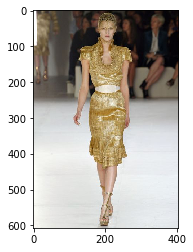

In [14]:
from scipy import ndimage
from matplotlib import pyplot as plt


file1=ndimage.imread('test_image.png')
plt.imshow(file1)
plt.show()

####  waist ~    @ 220,200

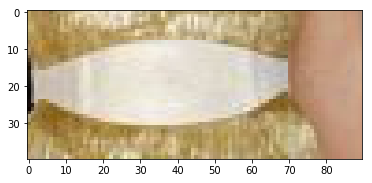

In [4]:
waist=file1[200:240,170:260]

#file1=ndimage.imread('test_image.png')
plt.imshow(waist)
plt.show()

In [28]:
waist_sample= file1[200:203,160:163]
waist_sample

array([[[18, 21, 38],
        [ 8,  7, 21],
        [29, 24, 28]],

       [[15, 20, 39],
        [ 9, 11, 24],
        [16, 14, 19]],

       [[11, 18, 34],
        [ 9, 13, 25],
        [14, 13, 19]]], dtype=uint8)

In [5]:
import numpy as np
mask = np.zeros(file1.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

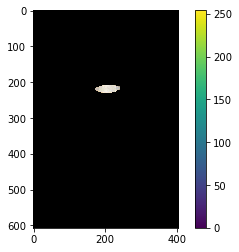

In [6]:
rect=(170,200,70,30)     #x1,y1,w,h
cv2.grabCut(file1,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = file1*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [8]:
#img

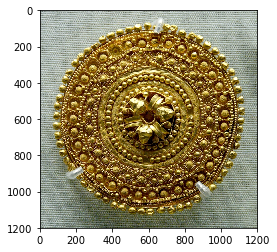

In [21]:
#### Lets do style Transfer between waist and this Filligree ! 

file1=ndimage.imread('filigree.png')
plt.imshow(file1)
plt.show()

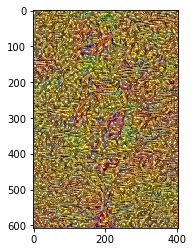

In [11]:
#### style-transferred image 

transfer=ndimage.imread('results_at_iteration_1.png')
plt.imshow(transfer)
plt.show()

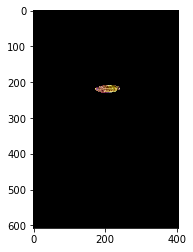

In [13]:
# extract the waist.. 

mask3 = np.where((img!=0),1,0).astype('uint8')
trans=mask3*transfer

plt.imshow(trans)
plt.show()

In [15]:
final = np.where((trans!=0),trans,file1).astype('uint8')

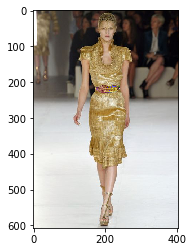

In [17]:
plt.imshow(final)
plt.show()